GOAL: To be able to take in a group of tweets, and generate new tweets based on the input

WHY: This system is flexible and works with any twitter user or any group of tweets.
     So ultimately can be applicable and mimicking someone's voice or learning a character.
     
HOW: An LSTM where the X is a group of characters and the y is the following character
     So rather than word by word, the system learns to type character by character

In [5]:
import tweepy

auth = tweepy.OAuthHandler('OX6EZZ9kea7e3QgICtbN5fep0',
                           'F5IYMC7pEUo4ntf2mSU9vAuO4Z4tGa3pb2yKgnxR4cEZItJrWa')
auth.set_access_token('360249871-fMMBIO5myYfsFfDE35FYak1EU1p3rACWCBP0BZga',
                      'kqZz9dzHEPsMkEZWXCbWlucdW6bYAoP0nYTh6g5QI5vkC')

api = tweepy.API(auth)

In [6]:
#initialize a list to hold all the tweepy Tweets
alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline('realDonaldTrump',count=200)

#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

print("Most recently fetched tweet: ", alltweets[-1].text)

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before " + str(oldest))
    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline('realDonaldTrump',count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" + str(len(alltweets)))
    print("Most recently fetched tweet: ", alltweets[-1].text)

Most recently fetched tweet:  Great to be in Riyadh, Saudi Arabia. Looking forward to the afternoon and evening ahead. #POTUSAbroad https://t.co/JJOra0KfyR
getting tweets before 865865814099939327
...%s tweets downloaded so far400
Most recently fetched tweet:  I will be interviewed by @MariaBartiromo at 6:00 A.M. @FoxBusiness. Enjoy!
getting tweets before 851997299454742527
...%s tweets downloaded so far600
Most recently fetched tweet:  Going to CPAC!
getting tweets before 835124485632180223
...%s tweets downloaded so far800
Most recently fetched tweet:  It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!
getting tweets before 822421390125043712
...%s tweets downloaded so far1000
Most recently fetched tweet:  Well, we all did it, together! I hope the "MOVEMENT" fans will go to D.C. on Jan 20th for the swearing in. Let's set the all time record!
getting tweets before 809790978332786688
...%s tweets downloaded so far1199
Most r

In [7]:
non_retweets = [t.text for t in alltweets if 'RT @' not in t.text]

In [8]:
non_retweets[:10]

['.@FLOTUS &amp; I were honored to host our first WH Congressional Picnic. A wonderful evening &amp; tradition. @MarineBand:… https://t.co/h5L4myWmam',
 "We're all thinking of you @SteveScalise! #TeamScalise https://t.co/Yqf6exhm7x",
 'Together, we are going to MAKE AMERICA GREAT AGAIN!\n#AmericaFirst🇺🇸 https://t.co/MVJbs44AtR',
 'I am very supportive of the Senate #HealthcareBill. Look forward to making it really special! Remember, ObamaCare is dead.',
 'Mexico was just ranked the second deadliest country in the world, after only Syria. Drug trade is largely the cause. We will BUILD THE WALL!',
 'As promised, our campaign against the MS-13 gang continues. \n\n"@ICEgov Busts 39 MS-13 Members in New York Operation"\nhttps://t.co/ki41GXeCMy',
 '...whether there are "tapes" or recordings of my conversations with James Comey, but I did not make, and do not have, any such recordings.',
 'With all of the recently reported electronic surveillance, intercepts, unmasking and illegal leaking of 

In [9]:
# REMOVING LINKS, EMOJIS, AND OTHER EXTRANEOUS CHARACTERS

non_links = []
for tweet in non_retweets:
    new_tweet = ' '.join(word for word in tweet.split() if word[0:4] != 'http')
    non_links.append(new_tweet)
    
# remove extraneous links
for tweet in non_links:
    if 'http' in tweet:
        non_links.remove(tweet)
        
import string
# removes all emojis from tweets
# technically removes all characters that are not letter, numbers, punctuation, or whitespace
no_emojis = []
for tweet in non_links:
    for c in list(tweet):
        if not c.isalnum() and c not in string.punctuation and c not in string.whitespace:
            tweet = tweet.replace(c, '')
    no_emojis.append(tweet)
    
# changes '&amp;' to simply '&'
# NEW - maybe replace with 'and' so it will learn how to spell 'and' rather have to learn where to place &
# idk bru
final_tweets = []
for tweet in no_emojis:
    if '&amp;' in tweet:
        tweet = tweet.replace('&amp;', '&')
    final_tweets.append(tweet)  

In [10]:
# remove extraneous links
for tweet in non_links:
    if 'http' in tweet:
        non_links.remove(tweet)

In [11]:
len(non_links)

2983

In [12]:
import string
# removes all emojis from tweets
# technically removes all characters that are not letter, numbers, punctuation, or whitespace
no_emojis = []
for tweet in non_links:
    for c in list(tweet):
        if not c.isalnum() and c not in string.punctuation and c not in string.whitespace:
            tweet = tweet.replace(c, '')
    no_emojis.append(tweet)

In [13]:
# changes '&amp;' to simply '&'
# NEW - maybe replace with 'and' so it will learn how to spell 'and' rather have to learn where to place &
# idk bru
final_tweets = []
for tweet in no_emojis:
    if '&amp;' in tweet:
        tweet = tweet.replace('&amp;', '&')
    final_tweets.append(tweet)    

In [14]:
len(final_tweets)

2983

In [15]:
final_tweets[0]

'.@FLOTUS & I were honored to host our first WH Congressional Picnic. A wonderful evening & tradition. @MarineBand:'

In [38]:
print(non_retweets[0])
print(final_tweets[0])

.@FLOTUS &amp; I were honored to host our first WH Congressional Picnic. A wonderful evening &amp; tradition. @MarineBand:… https://t.co/h5L4myWmam
.@FLOTUS & I were honored to host our first WH Congressional Picnic. A wonderful evening & tradition. @MarineBand:


In [16]:
print("Number of tweets: ", len(final_tweets))

Number of tweets:  2983


In [17]:
# all code below is based on Keras example documentation for LSTM Text Generation
chars = sorted(list(set(' '.join(final_tweets))))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 95


In [18]:
max_len = max(map(len, [tweet for tweet in final_tweets]))
print("Longest tweet in characters: ", max_len)

min_len = min(map(len, [tweet for tweet in final_tweets]))
print("Shortest tweet in characters: ", min_len)

Longest tweet in characters:  141
Shortest tweet in characters:  10


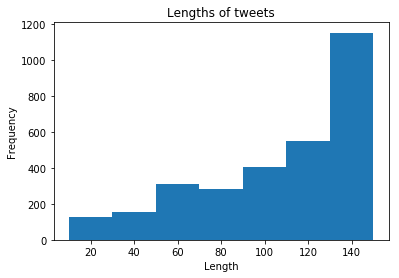

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

lengths = []
for tweet in final_tweets:
    lengths.append(len(tweet))

bin_width = 20
plt.hist(lengths, bins=range(min(lengths), max(lengths)+bin_width, bin_width))
plt.title("Lengths of tweets")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [21]:
# cut the text in semi-redundant sequences of maxlen characters
# idea for later cut text relative to size of tweet aka maxlen = len(tweet)/3
maxlen = 10
step = 3
sentences = []
next_chars = []
for tweet in final_tweets:
    if len(tweet) > maxlen:
        for i in range(0, len(tweet) - maxlen, step):
            sentences.append(tweet[i: i + maxlen])
            next_chars.append(tweet[i + maxlen])
    # two options here:
    # could iterate with a range like above, using lengths of 10 (min tweet length)
    # or could just get one sentence from each tweet based on length of each tweet
    else:
        sentences.append(tweet[:len(tweet)-2])
        next_chars.append(tweet[len(tweet)-1])
print('nb sequences:', len(sentences))

import numpy as np

# might need to pad shorter sentences? jk apparently not
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 95719


In [22]:
import numpy as np

# might need to pad shorter sentences? jk apparently not
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop

# Building the model
print('Building model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars)))) # , return_sequences=True)) # might have problems if fed a shorter tweet than maxlen?
model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01) # experiment by adding ReduceLROnPlateau
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Building model...


In [23]:
# essentially a softmax function with an option to change the degree of variability
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [2]:
# actually don't think I need this, just starting with a different X and y
from keras.models import load_model

# RELOAD BEST ONE LAYER AND JUST TRAIN IT MORE while finishing up
model = load_model('my_model_BEST_VERSION.h5') # start here and reload. You just saved best one layer version. Currently running first two layer

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1, epsilon=0.0003)
early_stopping = EarlyStopping(monitor='loss', patience=5)
checkpointer = ModelCheckpoint(filepath='new_model.h5', verbose=1, save_best_only=True)

model.fit(X, y, batch_size=128, epochs=500, callbacks=[reduce_lr, early_stopping, checkpointer])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1, epsilon=0.0003)
early_stopping = EarlyStopping(monitor='loss', patience=5)
checkpointer = ModelCheckpoint(filepath='new_model.h5', verbose=1, save_best_only=True)

model.fit(X, y, batch_size=128, epochs=500, callbacks=[reduce_lr, early_stopping, checkpointer])

Epoch 1/500
67600/67600 [==============================] - 355s - loss: 6.7670   
Epoch 2/500


/home/hbh3re/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:405: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


67600/67600 [==============================] - 339s - loss: 6.5344   
Epoch 3/500
67600/67600 [==============================] - 376s - loss: 6.3068   
Epoch 4/500
67600/67600 [==============================] - 322s - loss: 6.1378   
Epoch 5/500
67600/67600 [==============================] - 402s - loss: 5.9845   
Epoch 6/500
67600/67600 [==============================] - 330s - loss: 5.9072   
Epoch 7/500
67600/67600 [==============================] - 324s - loss: 5.8071   
Epoch 8/500
67600/67600 [==============================] - 379s - loss: 5.7133   
Epoch 9/500
67600/67600 [==============================] - 353s - loss: 5.6145   
Epoch 10/500
67600/67600 [==============================] - 379s - loss: 5.5624   
Epoch 11/500
67600/67600 [==============================] - 349s - loss: 5.4516   
Epoch 12/500
67600/67600 [==============================] - 327s - loss: 5.3945   
Epoch 13/500
67600/67600 [==============================] - 370s - loss: 5.3883   
Epoch 14/500
67600/67600

In [29]:
model.save('new_model_maxlen_10_epoch_35.h5') # we are currenlty running maxlen = 40, batch_size = 64, two LSTMs

In [34]:
lengths2 = []
for sent in sentences:
    lengths2.append(len(list(sent)))

In [36]:
listy = set(lengths2)
listy

{8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40}

In [37]:
import random
import sys

list_1 = []
list_05 = []
list_02 = []
# train the model, output generated text after each iteration
for iteration in range(1, 100):
    # print()
    # print('-' * 50)
    print('Iteration', iteration)
    '''model.fit(X, y,
              batch_size=128,
              epochs=1)'''

    start_index = random.randint(0, len(sentences)) # choose index to get random tweet beginning

    for diversity in [0.2, 0.5, 1.0]:
        # print()
        # print('----- diversity:', diversity)

        generated = ''
        sentence = sentences[start_index] # get the tweet using the random index
        generated += sentence
        # print('----- Generating with seed: "' + sentence + '"')
        # sys.stdout.write(generated)

        for i in range(140-maxlen): # max length of a tweet is 140 characters
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            # sys.stdout.write(next_char)
            # sys.stdout.flush()
        # print()
        if diversity == 0.2:
            list_02.append(generated)
        if diversity == 0.5:
            list_05.append(generated)
        if diversity == 1.0:
            list_1.append(generated)

Iteration 1


/home/hbh3re/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteration 78
Iterati

In [63]:

# List of words in a sentence to all ngrams
def ngrams(words, n):
    words = [w.strip().lower() for w in words.split()]
    return list(zip(*[words[i:] for i in range(n)]))

# SpaCy sentence to words in sentence as strings
def get_words(sentence):
    return list(w for w in sentence.split() if w.isalpha())

# Get all ngrams from a SpaCy corpus
def get_request_ngrams(list_, n):
    return [gram for sent in list_ for gram in ngrams(get_words(sent), n)]

# Get all ngrams from a list of SpaCy corpora
def get_all_ngrams(request_text, n):
    grams = set()
    for text in request_text:
        grams.update(get_request_ngrams(text, n))
    return grams

In [75]:
trigram02 = []
for tweet in list_02:
    trigram02.append(ngrams(tweet, 3))
    
trigram05 = []
for tweet in list_05:
    trigram05.append(ngrams(tweet, 3))
    
trigram1 = []
for tweet in list_1:
    trigram1.append(ngrams(tweet, 3))

In [90]:
flat_list02 = [item for sublist in trigram02 for item in sublist]

In [98]:
list_02[:5]

['up--and whe after helling have a borery that me would but illegal immigration and bad and have a bettle the proud of my learing and was so m',
 'ff for Cincinnati, Ohio to get me would but when I will be in the China on @FoxNews at the last night at the last night at the last night at',
 'othing about the world. We will be there was a total stronghey at ANR A ALL  REATON ANE AN Ackon Amaiefiom to be have a big respect to the g',
 ' to cost you to the disgrace to be prodesd a story bust and the so want to sades stand have a big respect to the great people workd atteal t',
 'y has ever before the prodesd states and going to be a great worked batters! #DrainTheSwamp #Americabifs! #ImWithYou #Trump2016 #AmericaFirs']

In [101]:
list_05[5:10]

["aine oversaties amaigctions to is dead to see it will make she didn't thempen! #MAGA Tickets: #ImWithYou #AmericaFirst #MAGA! Thank you for ",
 'people who are beane and the media will going to have a line that my failing @nytimes story going to inficering for their never she is a lon',
 "lDonaldTrump @Senatianation a total stronghey plan on the time in her I am should be great calls would be calling that she will don't be the",
 'le, North Carolina that she will destroy some out! #MAGA Tickets: #DrainTheSwamp #AmericaFirst #MAGA! Toge haned is running again! #DrainThe',
 'The White House to she is a disaster! When harling to be bad the beginning to the hange in the United States and get in the media is a creat']

In [102]:
list_1[10:15]

['interest with she will drigat State email on my Truwp Io, IowE ! Insidealtimes! Enj ythes are crease on our joblity. The lations, the Writio',
 'amond and  course yeve Is action plan and defend to put wall thing to do sholling my really believe the @2gswexfast. DClonpenday to get out ',
 'asp when the Democrats Kan Averina Respented that will deneers and proke wath to all of the Democrats, jobs in the continumed by the United ',
 'is in a dex me to we I disanairs. But racly millions! Numanisthachs to bail to but a bad ! Biggtam Carolina tomorrow at nManS and 8dmn. Fake',
 'ookedHillary is the udObamaning Obama is Governor @Mike_Pence ! Fine @mighetearion should take a want of the Dems are to believe the WILL .o']

In [91]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(10)

Most_Common(flat_list02)

[(('will', 'be', 'there'), 21),
 (('the', 'failing', '@nytimes'), 20),
 (('the', 'last', 'night'), 19),
 (('media', 'is', 'a'), 19),
 (('last', 'night', 'at'), 18),
 (('be', 'there', 'was'), 18),
 (('the', 'media', 'is'), 18),
 (('night', 'at', 'the'), 15),
 (('at', 'the', 'last'), 13),
 (('to', 'be', 'a'), 13)]

In [113]:
gram1 = []
for tweet in list_1:
    gram1.append(ngrams(tweet, 1))

In [115]:
hashtags = [item for sublist in gram1 for item in sublist]

In [124]:
hashtags2 = [tag for tag in hashtags if tag[0][0] == '#']

In [127]:
Most_Common(hashtags2)

[(('#debate',), 5),
 (('#americafirst!',), 3),
 (('#draintheswamp',), 3),
 (('#trump2016',), 3),
 (('#maga',), 2),
 (('#imwithyou',), 2),
 (('#imw',), 1),
 (('#americafirst',), 1),
 (('#makeamericagreatagain.',), 1),
 (('#magae',), 1)]

What I will do in the future:

- Experiement more with the model
- Pin down which length is best to train on
- Main goal: add a spell checking network on top of the text generation network
- Perhaps add sentiment analysis and similarity between words, and combining with those results during training
- Add credits for functions used above